In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Patients.csv')
df

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI
0,Female,80.0,0,0,0,1,never,25.19
1,Female,54.0,0,0,0,0,NaN,NaN
2,Male,28.0,0,0,0,0,never,NaN
3,Female,36.0,0,0,0,0,current,23.45
4,Male,76.0,0,1,0,1,current,20.14
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,0,0,NaN,NaN
99996,Female,2.0,0,0,0,0,NaN,17.37
99997,Male,66.0,0,0,0,0,former,27.83
99998,Female,24.0,0,0,0,0,never,35.42


In [3]:
df.head()

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI
0,Female,80.0,0,0,0,1,never,25.19
1,Female,54.0,0,0,0,0,NaN,NaN
2,Male,28.0,0,0,0,0,never,NaN
3,Female,36.0,0,0,0,0,current,23.45
4,Male,76.0,0,1,0,1,current,20.14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   gender           100000 non-null  object 
 1   age              100000 non-null  float64
 2   diabetes         100000 non-null  int64  
 3   hypertension     100000 non-null  int64  
 4   stroke           100000 non-null  int64  
 5   heart disease    100000 non-null  int64  
 6   smoking history  64184 non-null   object 
 7   BMI              74556 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 6.1+ MB


In [5]:
df.describe()

,age,diabetes,hypertension,stroke,heart disease,BMI
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,74556.000000
mean,41.885856,0.085000,0.07485,0.014260,0.039420,27.321029
std,22.516840,0.278883,0.26315,0.118561,0.194593,7.686296
min,0.080000,0.000000,0.00000,0.000000,0.000000,10.010000
25%,24.000000,0.000000,0.00000,0.000000,0.000000,22.030000
50%,43.000000,0.000000,0.00000,0.000000,0.000000,26.500000
75%,60.000000,0.000000,0.00000,0.000000,0.000000,31.530000
max,80.000000,1.000000,1.00000,1.000000,1.000000,95.690000


In [6]:
df.keys

<bound method NDFrame.keys of        gender   age  diabetes  hypertension  stroke  heart disease  \
0      Female  80.0         0             0       0              1   
1      Female  54.0         0             0       0              0   
2        Male  28.0         0             0       0              0   
3      Female  36.0         0             0       0              0   
4        Male  76.0         0             1       0              1   
...       ...   ...       ...           ...     ...            ...   
99995  Female  80.0         0             0       0              0   
99996  Female   2.0         0             0       0              0   
99997    Male  66.0         0             0       0              0   
99998  Female  24.0         0             0       0              0   
99999  Female  57.0         0             0       0              0   

      smoking history    BMI  
0               never  25.19  
1                 NaN    NaN  
2               never    NaN  
3    

In [7]:
df.isnull()

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,True,True
99996,False,False,False,False,False,False,True,False
99997,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

gender                 0
age                    0
diabetes               0
hypertension           0
stroke                 0
heart disease          0
smoking history    35816
BMI                25444
dtype: int64

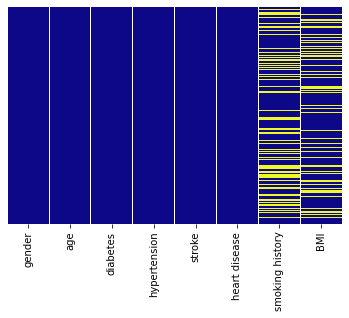

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma')

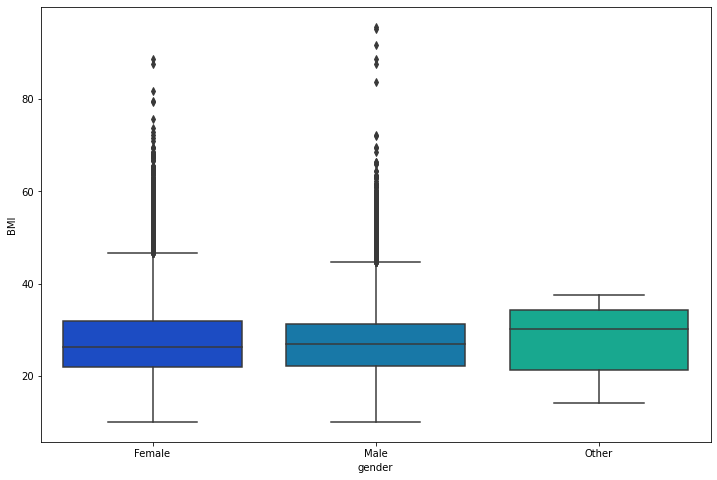

In [10]:
plt.figure(figsize=(12,8))
sns.boxplot(x='gender',y='BMI',data=df,palette='winter')

In [11]:
def impute_bmi(cols):
    BMI = cols[0]
    gender = cols[1]
    
    if pd.isnull(BMI):

        if gender == 'female':
            return 24

        elif gender == 'male':
            return 26

        else:
            return 30

    else:
        return BMI

In [12]:
df['BMI'] = df[['BMI','gender']].apply(impute_bmi,axis=1)

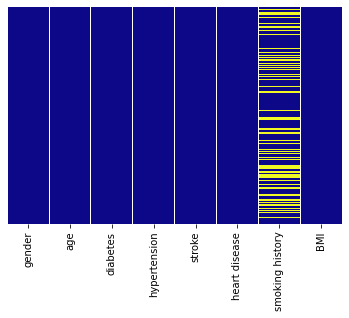

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [14]:
df

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI
0,Female,80.0,0,0,0,1,never,25.19
1,Female,54.0,0,0,0,0,NaN,30.00
2,Male,28.0,0,0,0,0,never,30.00
3,Female,36.0,0,0,0,0,current,23.45
4,Male,76.0,0,1,0,1,current,20.14
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,0,0,NaN,30.00
99996,Female,2.0,0,0,0,0,NaN,17.37
99997,Male,66.0,0,0,0,0,former,27.83
99998,Female,24.0,0,0,0,0,never,35.42


In [15]:
df

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI
0,Female,80.0,0,0,0,1,never,25.19
1,Female,54.0,0,0,0,0,NaN,30.00
2,Male,28.0,0,0,0,0,never,30.00
3,Female,36.0,0,0,0,0,current,23.45
4,Male,76.0,0,1,0,1,current,20.14
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,0,0,NaN,30.00
99996,Female,2.0,0,0,0,0,NaN,17.37
99997,Male,66.0,0,0,0,0,former,27.83
99998,Female,24.0,0,0,0,0,never,35.42


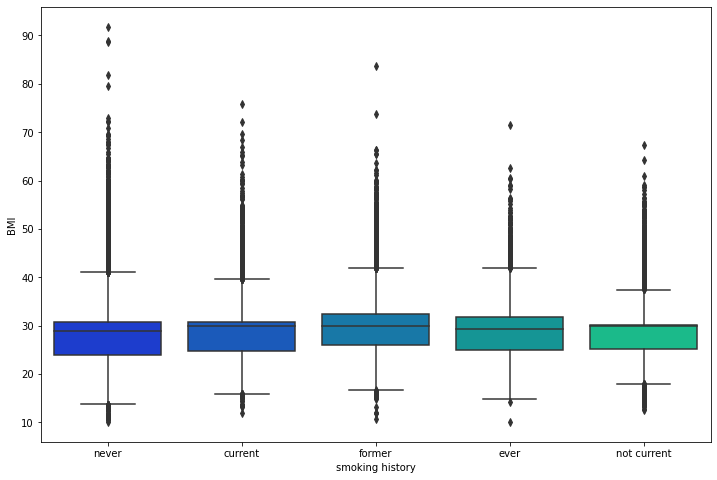

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(x='smoking history',y='BMI',data=df,palette='winter')

In [17]:
def impute_sh(cols):
    smoking_history = cols[0]
    BMI = cols[1]
    
    if pd.isnull(smoking_history):

        if BMI == 25:
            return 'never'

        elif BMI == 26:
            return 'current'
        
        elif BMI == 28:
            return 'former'
        
        elif BMI == 26:
            return 'ever'

        else:
            return 'not current'

    else:
        return smoking_history

In [18]:
df['smoking history'] = df[['smoking history','BMI']].apply(impute_sh,axis=1)

In [19]:
df

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI
0,Female,80.0,0,0,0,1,never,25.19
1,Female,54.0,0,0,0,0,not current,30.00
2,Male,28.0,0,0,0,0,never,30.00
3,Female,36.0,0,0,0,0,current,23.45
4,Male,76.0,0,1,0,1,current,20.14
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,0,0,not current,30.00
99996,Female,2.0,0,0,0,0,not current,17.37
99997,Male,66.0,0,0,0,0,former,27.83
99998,Female,24.0,0,0,0,0,never,35.42


In [20]:
df.to_csv('health_data.csv',index=False)

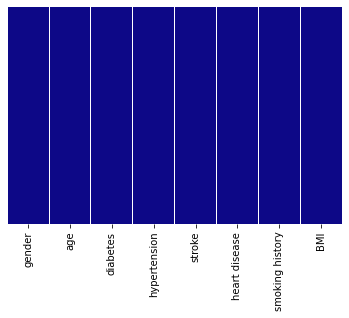

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [22]:
df

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI
0,Female,80.0,0,0,0,1,never,25.19
1,Female,54.0,0,0,0,0,not current,30.00
2,Male,28.0,0,0,0,0,never,30.00
3,Female,36.0,0,0,0,0,current,23.45
4,Male,76.0,0,1,0,1,current,20.14
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,0,0,not current,30.00
99996,Female,2.0,0,0,0,0,not current,17.37
99997,Male,66.0,0,0,0,0,former,27.83
99998,Female,24.0,0,0,0,0,never,35.42


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


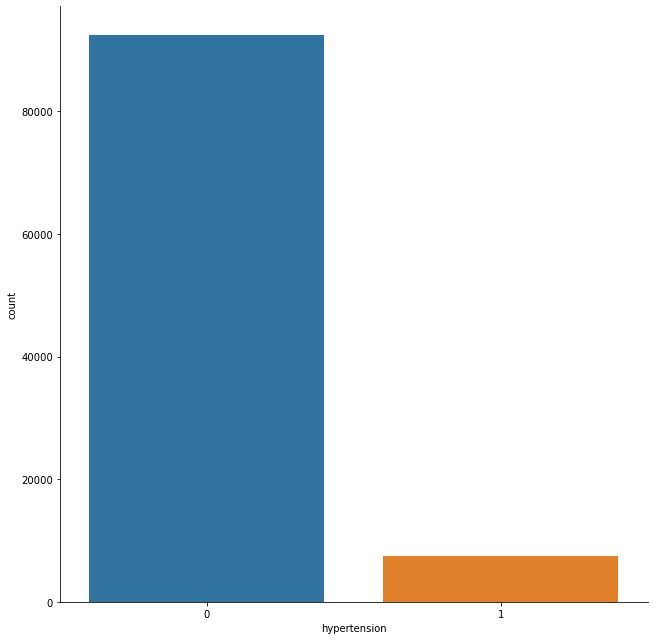

In [23]:
sns.catplot(x='hypertension',kind='count',data=df,aspect=1,size=9)
plt.savefig('a.png')

In [24]:
df['hypertension'].value_counts()

0    92515
1     7485
Name: hypertension, dtype: int64

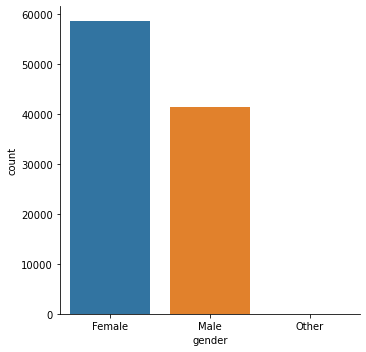

In [25]:
sns.catplot(x='gender',kind='count',data=df)
plt.savefig('b.png')

In [26]:
pd.DataFrame(df['gender'].value_counts())

,gender
Female,58552
Male,41430
Other,18


In [27]:
pd.DataFrame(df.columns)

,0
0,gender
1,age
2,diabetes
3,hypertension
4,stroke
5,heart disease
6,smoking history
7,BMI


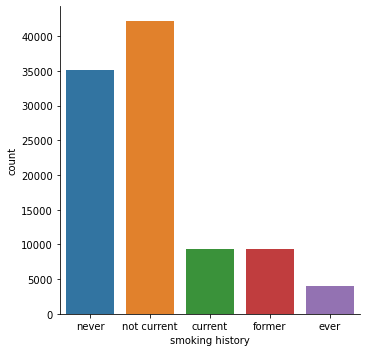

In [28]:
sns.catplot(x='smoking history',kind='count',data=df,aspect=1)
plt.savefig('c.png')

In [29]:
df['age'].value_counts()

80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
1.00       83
0.48       83
0.40       66
0.16       59
0.08       36
Name: age, Length: 102, dtype: int64

In [30]:
df['hypertension'].value_counts()

0    92515
1     7485
Name: hypertension, dtype: int64

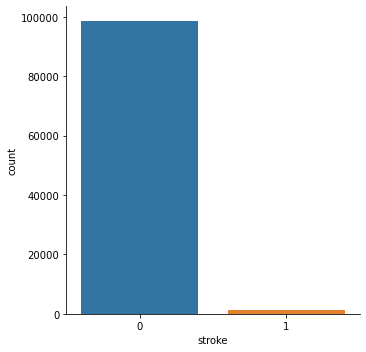

In [31]:
sns.catplot(x='stroke',kind='count',data=df)
plt.savefig('d.png')

In [32]:
df['stroke'].value_counts()

0    98574
1     1426
Name: stroke, dtype: int64

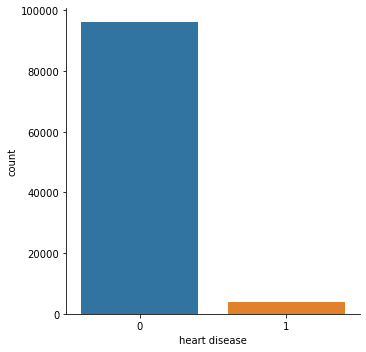

In [33]:
sns.catplot(x='heart disease',kind='count',data=df)
plt.savefig('e.png')

In [34]:
df['heart disease'].value_counts()

0    96058
1     3942
Name: heart disease, dtype: int64

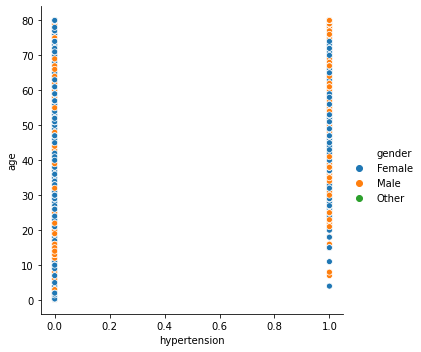

In [35]:
sns.relplot(x="hypertension", y="age", hue="gender", data=df);

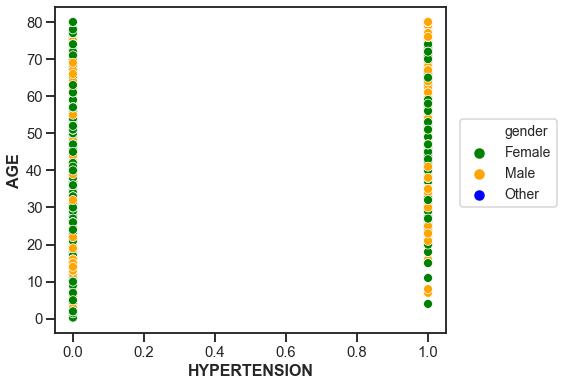

In [36]:
plt.figure(figsize=(7,6))

fontdict={'fontsize': 18,
          'weight' : 'bold',
         'horizontalalignment': 'center'}

sns.set_context('talk', font_scale=0.9)
sns.set_style('ticks')

sns.scatterplot(x='hypertension', y='age', hue='gender', data=df, 
                    palette=['green','orange','blue'], legend='full')

plt.legend(scatterpoints=1,
           bbox_to_anchor=(1, 0.7), loc=2, borderaxespad=1.,
           ncol=1,
           fontsize=14)
plt.xlabel('HYPERTENSION', fontsize=16, fontweight='bold')
plt.ylabel('AGE', fontsize=16, fontweight='bold')
plt.savefig('f.png')

In [37]:
df

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI
0,Female,80.0,0,0,0,1,never,25.19
1,Female,54.0,0,0,0,0,not current,30.00
2,Male,28.0,0,0,0,0,never,30.00
3,Female,36.0,0,0,0,0,current,23.45
4,Male,76.0,0,1,0,1,current,20.14
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,0,0,not current,30.00
99996,Female,2.0,0,0,0,0,not current,17.37
99997,Male,66.0,0,0,0,0,former,27.83
99998,Female,24.0,0,0,0,0,never,35.42


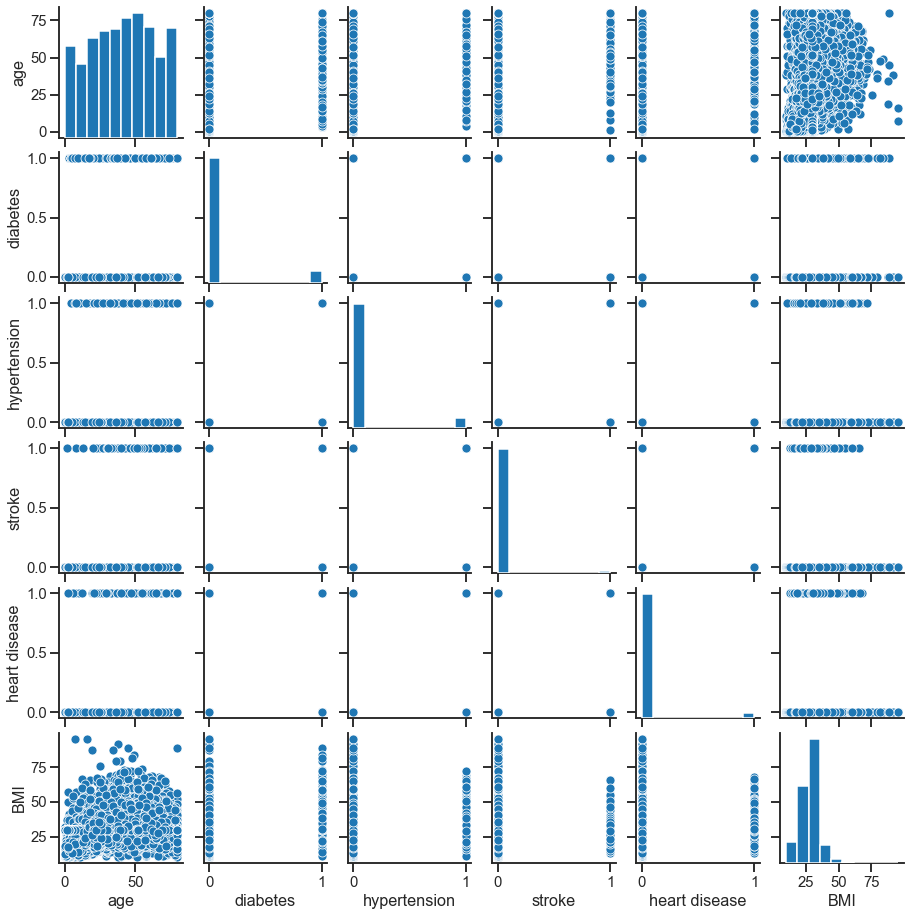

In [38]:
sns.pairplot(data=df,aspect=1,height=2.1)
plt.savefig('g.png')

In [39]:
df['smoking history'].value_counts()

not current    42203
never          35112
former          9374
current         9307
ever            4004
Name: smoking history, dtype: int64

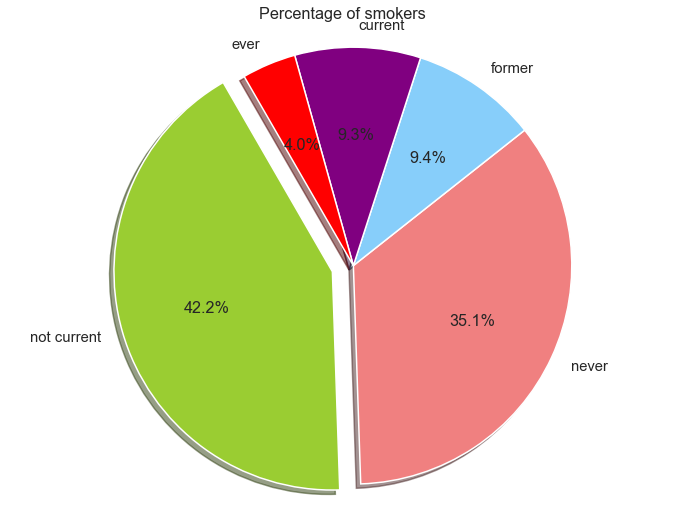

<Figure size 1368x2880 with 0 Axes>

In [40]:
plt.figure(figsize=(12,9))
labels = 'not current', 'never', 'former', 'current','ever'
sizes = [42203, 35112, 9374, 9307,4004]
colors = ['yellowgreen', 'lightcoral', 'lightskyblue','purple','red']
explode = (0.1,0, 0, 0,0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=120)
plt.rcParams['figure.figsize']=(19,40)
plt.axis('equal')
plt.title('Percentage of smokers')
plt.show()

plt.savefig('h.png',dpi=100)


In [41]:
df.head()

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI
0,Female,80.0,0,0,0,1,never,25.19
1,Female,54.0,0,0,0,0,not current,30.00
2,Male,28.0,0,0,0,0,never,30.00
3,Female,36.0,0,0,0,0,current,23.45
4,Male,76.0,0,1,0,1,current,20.14


In [42]:
#plt.figure(figsize=(12,3))
sns.catplot(x="smoking history", y="age", hue="gender",
            palette={"Male": "g", "Female": "m",'Other':'b'},
            markers=["^", "o","+"], linestyles=["-", "--",'-'],
           kind='point',height=50,aspect=10,data=df,fontsize=20,font='bold');

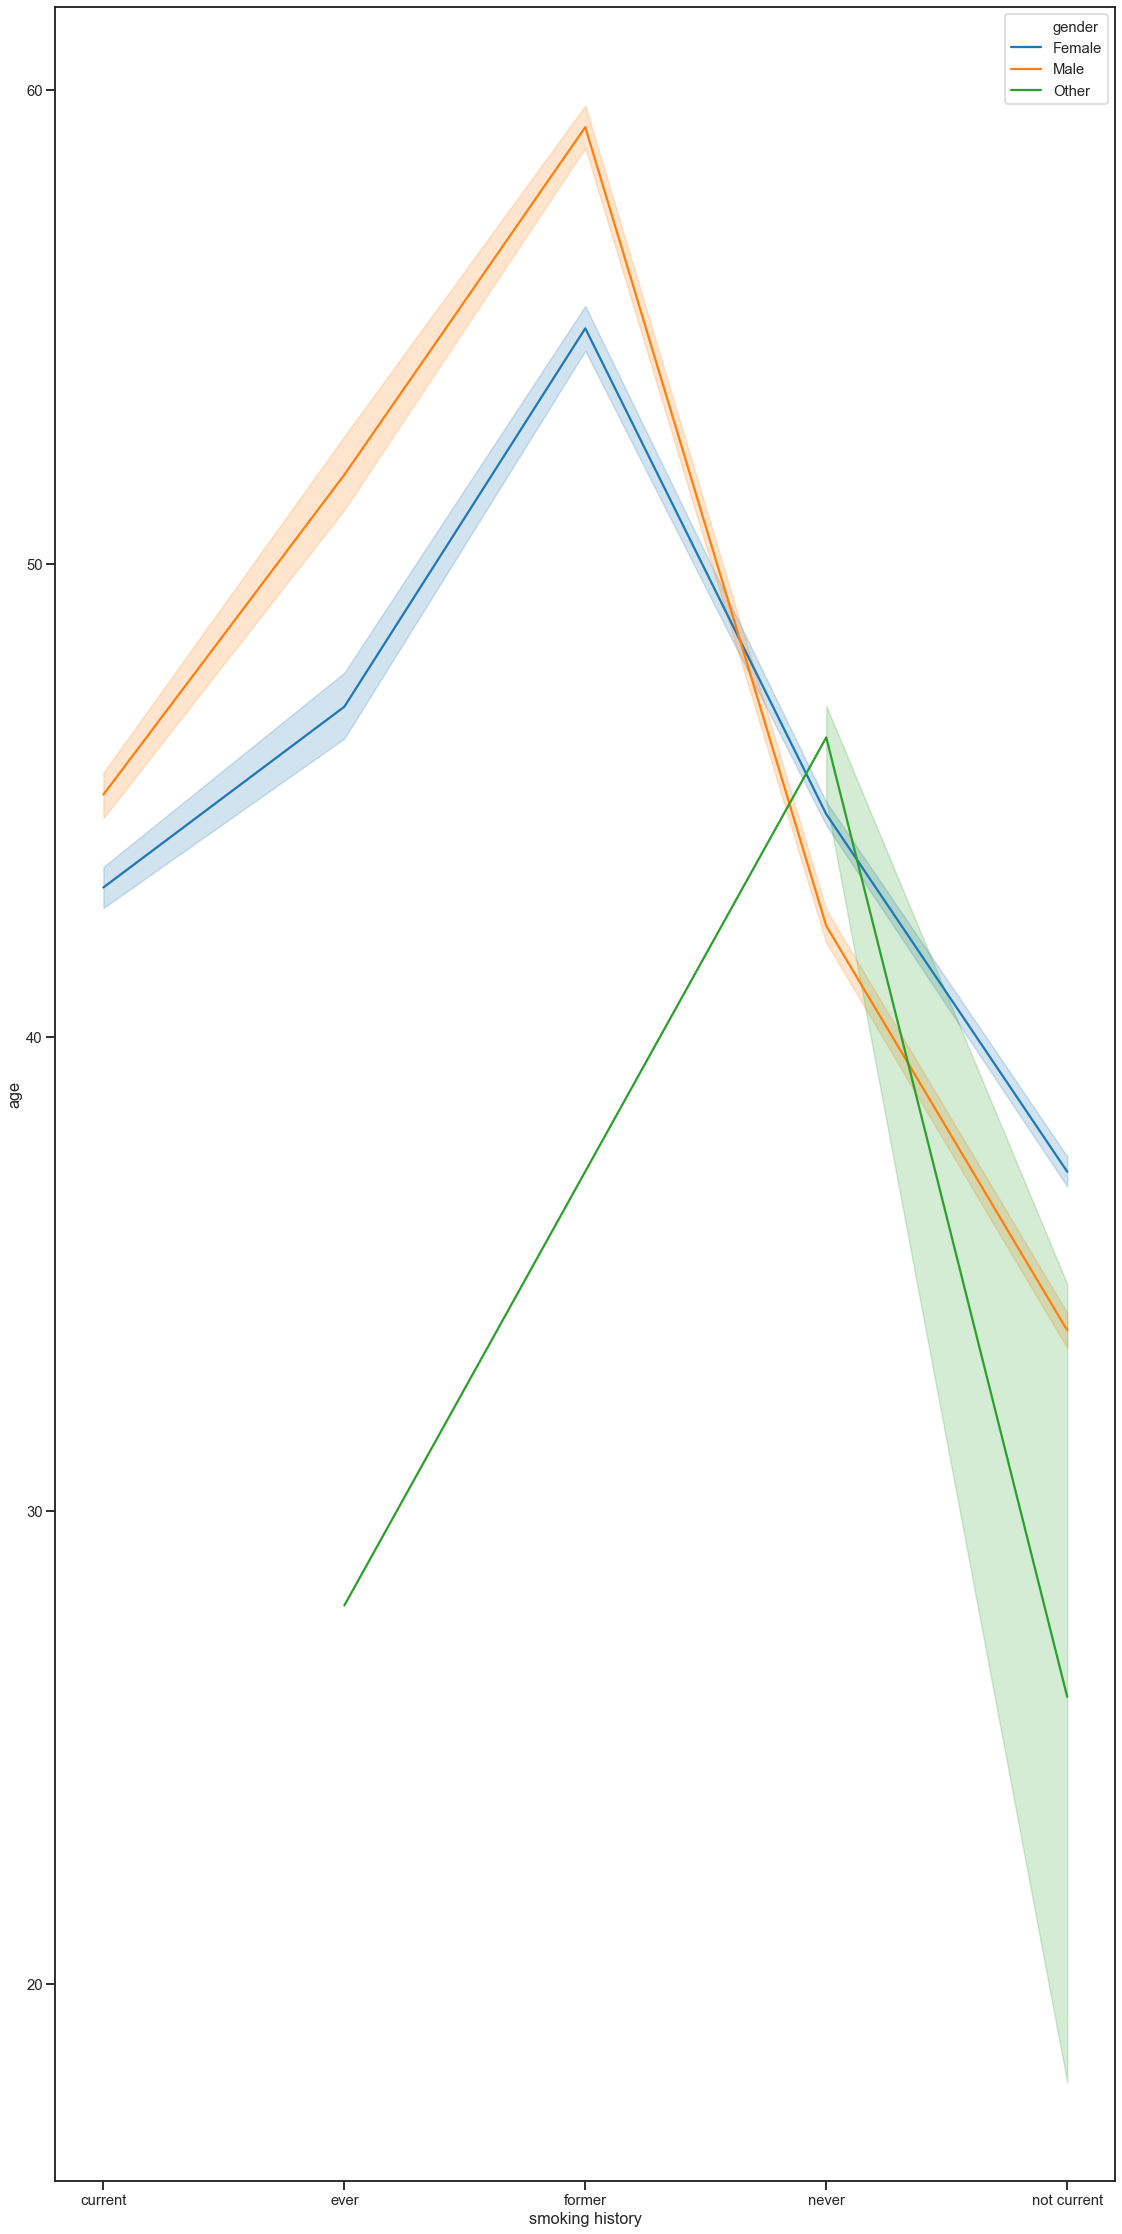

In [43]:
ax = sns.lineplot(x="smoking history", y="age", hue="gender",data=df,color=('red','yellow'))
plt.savefig('i.png')

In [44]:
# def income (x):
#     if x>=25:
#         return 'OVERWEIGHT'
#     elif x>=30:
#         return 'OBESITY'
#     elif x>40:
#         return 'SEVERE OBESITY'
#     else:
#         return 'NON OVERWEIGHT'
# df['Level']=df['BMI'].apply(income)

In [45]:
df

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI
0,Female,80.0,0,0,0,1,never,25.19
1,Female,54.0,0,0,0,0,not current,30.00
2,Male,28.0,0,0,0,0,never,30.00
3,Female,36.0,0,0,0,0,current,23.45
4,Male,76.0,0,1,0,1,current,20.14
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,0,0,not current,30.00
99996,Female,2.0,0,0,0,0,not current,17.37
99997,Male,66.0,0,0,0,0,former,27.83
99998,Female,24.0,0,0,0,0,never,35.42


In [46]:
df['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

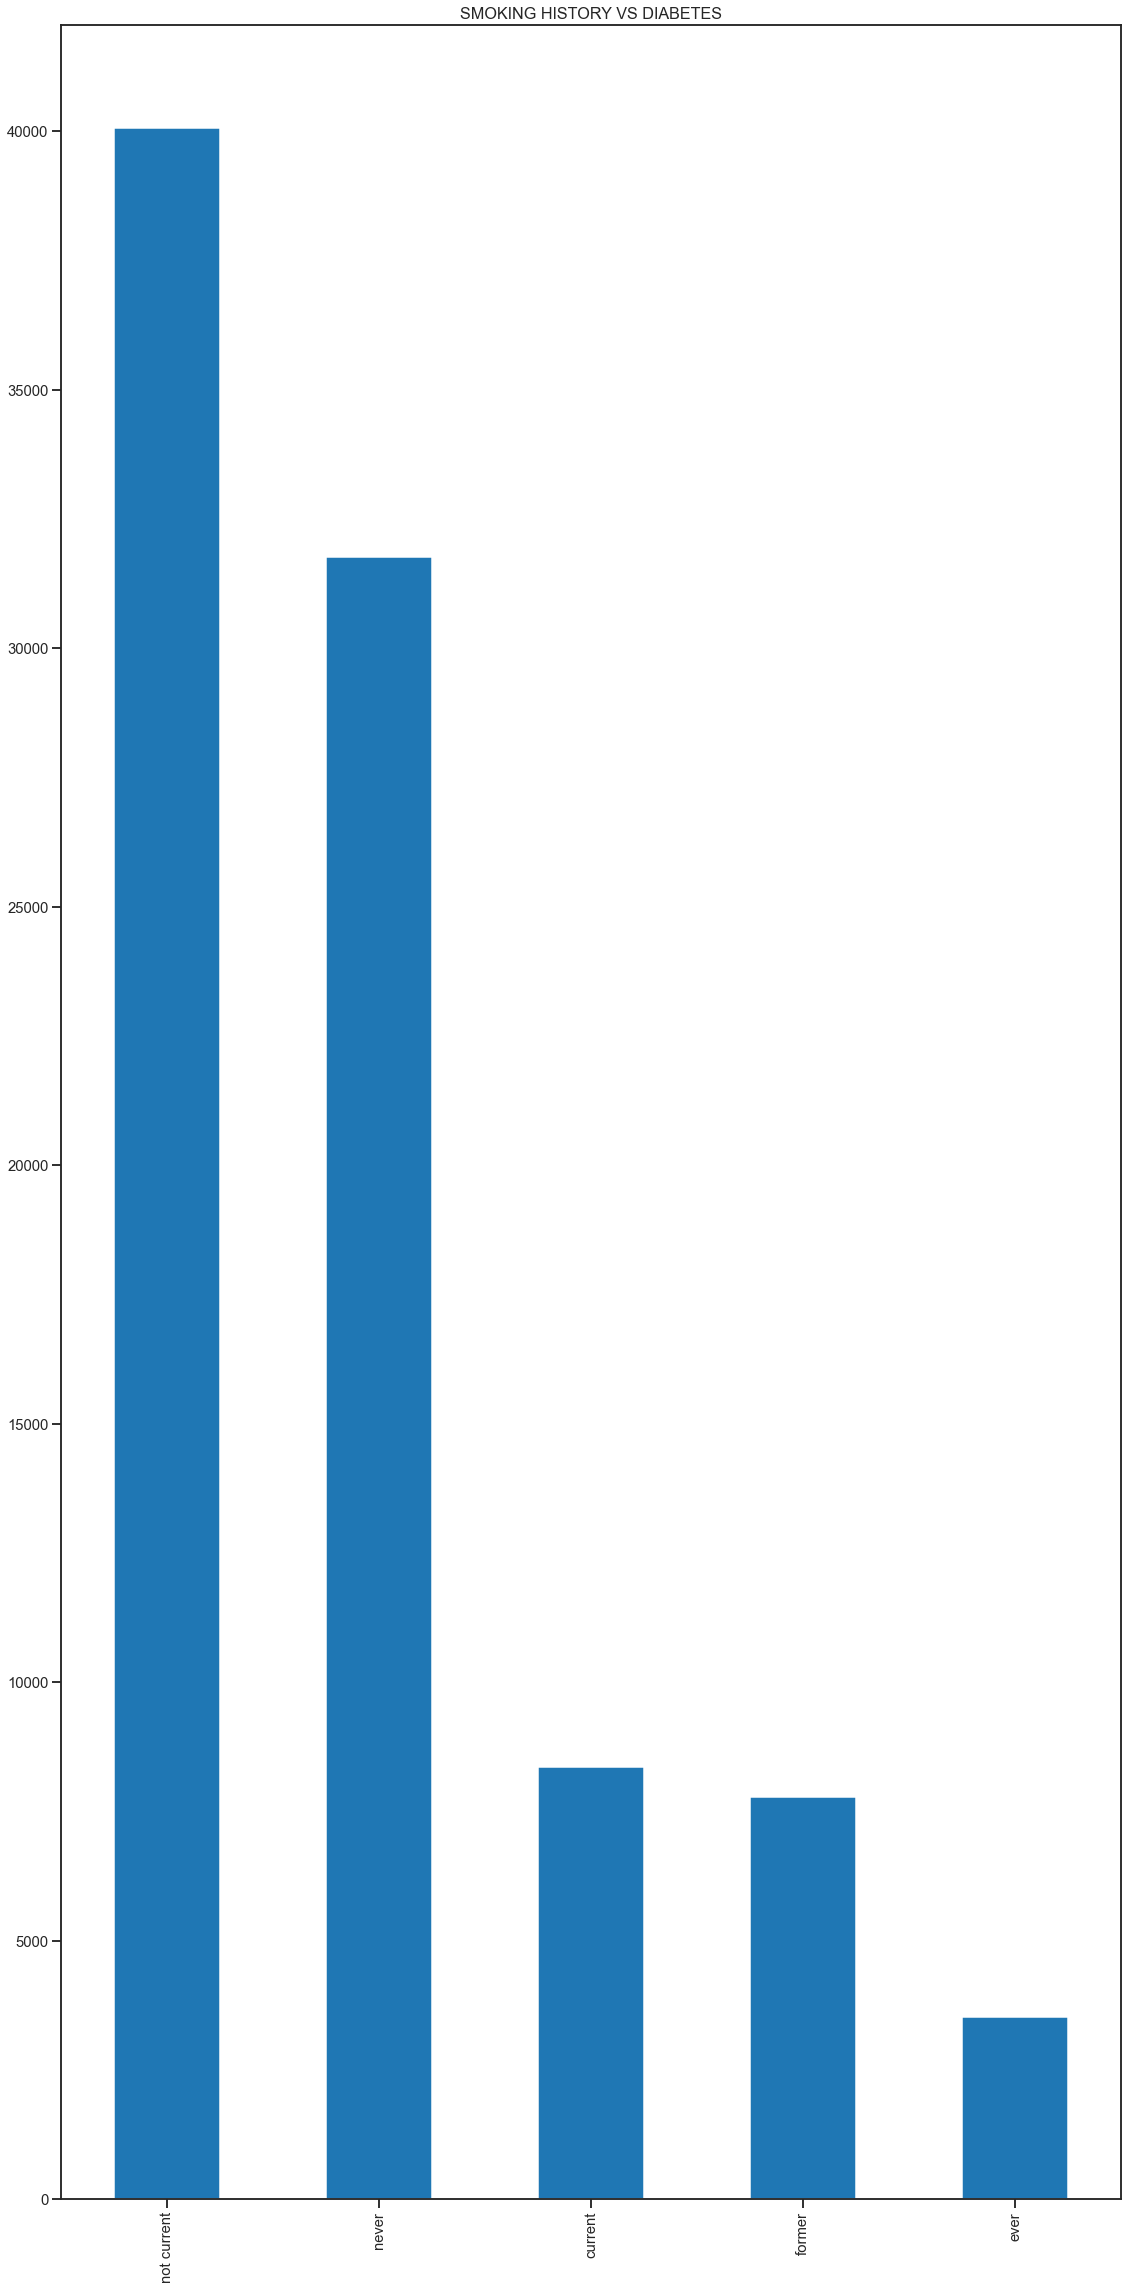

In [49]:
df[df['diabetes']==0] ['smoking history'].value_counts().plot(kind='bar', title='SMOKING HISTORY VS DIABETES')

In [51]:
df['heart disease'].value_counts()

0    96058
1     3942
Name: heart disease, dtype: int64

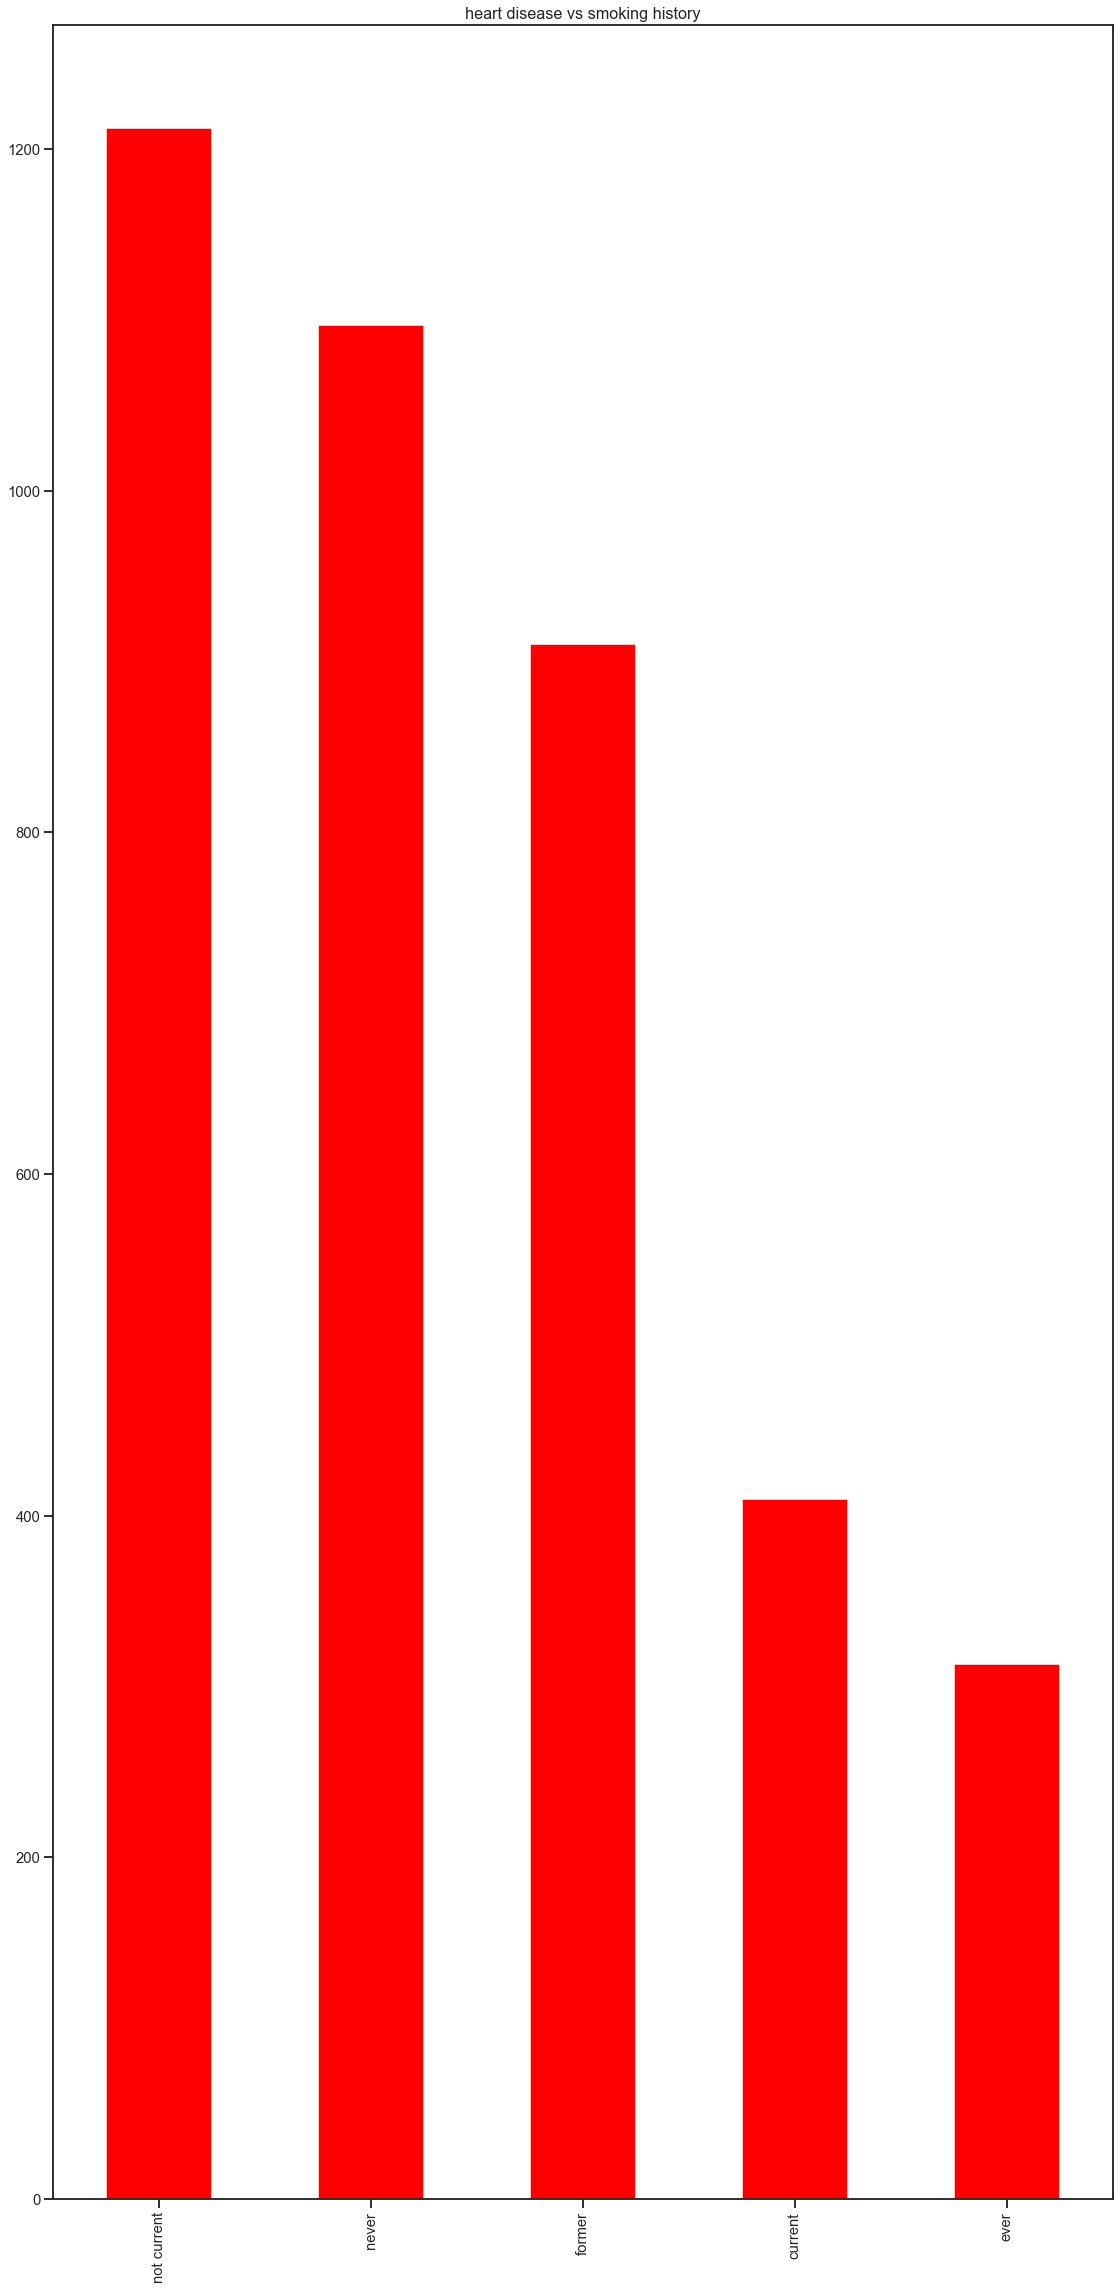

In [52]:
df[df['heart disease']==1] ['smoking history'].value_counts().plot(kind='bar',color='red', title='heart disease vs smoking history')

In [53]:
df.head()

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI
0,Female,80.0,0,0,0,1,never,25.19
1,Female,54.0,0,0,0,0,not current,30.00
2,Male,28.0,0,0,0,0,never,30.00
3,Female,36.0,0,0,0,0,current,23.45
4,Male,76.0,0,1,0,1,current,20.14


In [54]:
df['stroke'].value_counts()

0    98574
1     1426
Name: stroke, dtype: int64

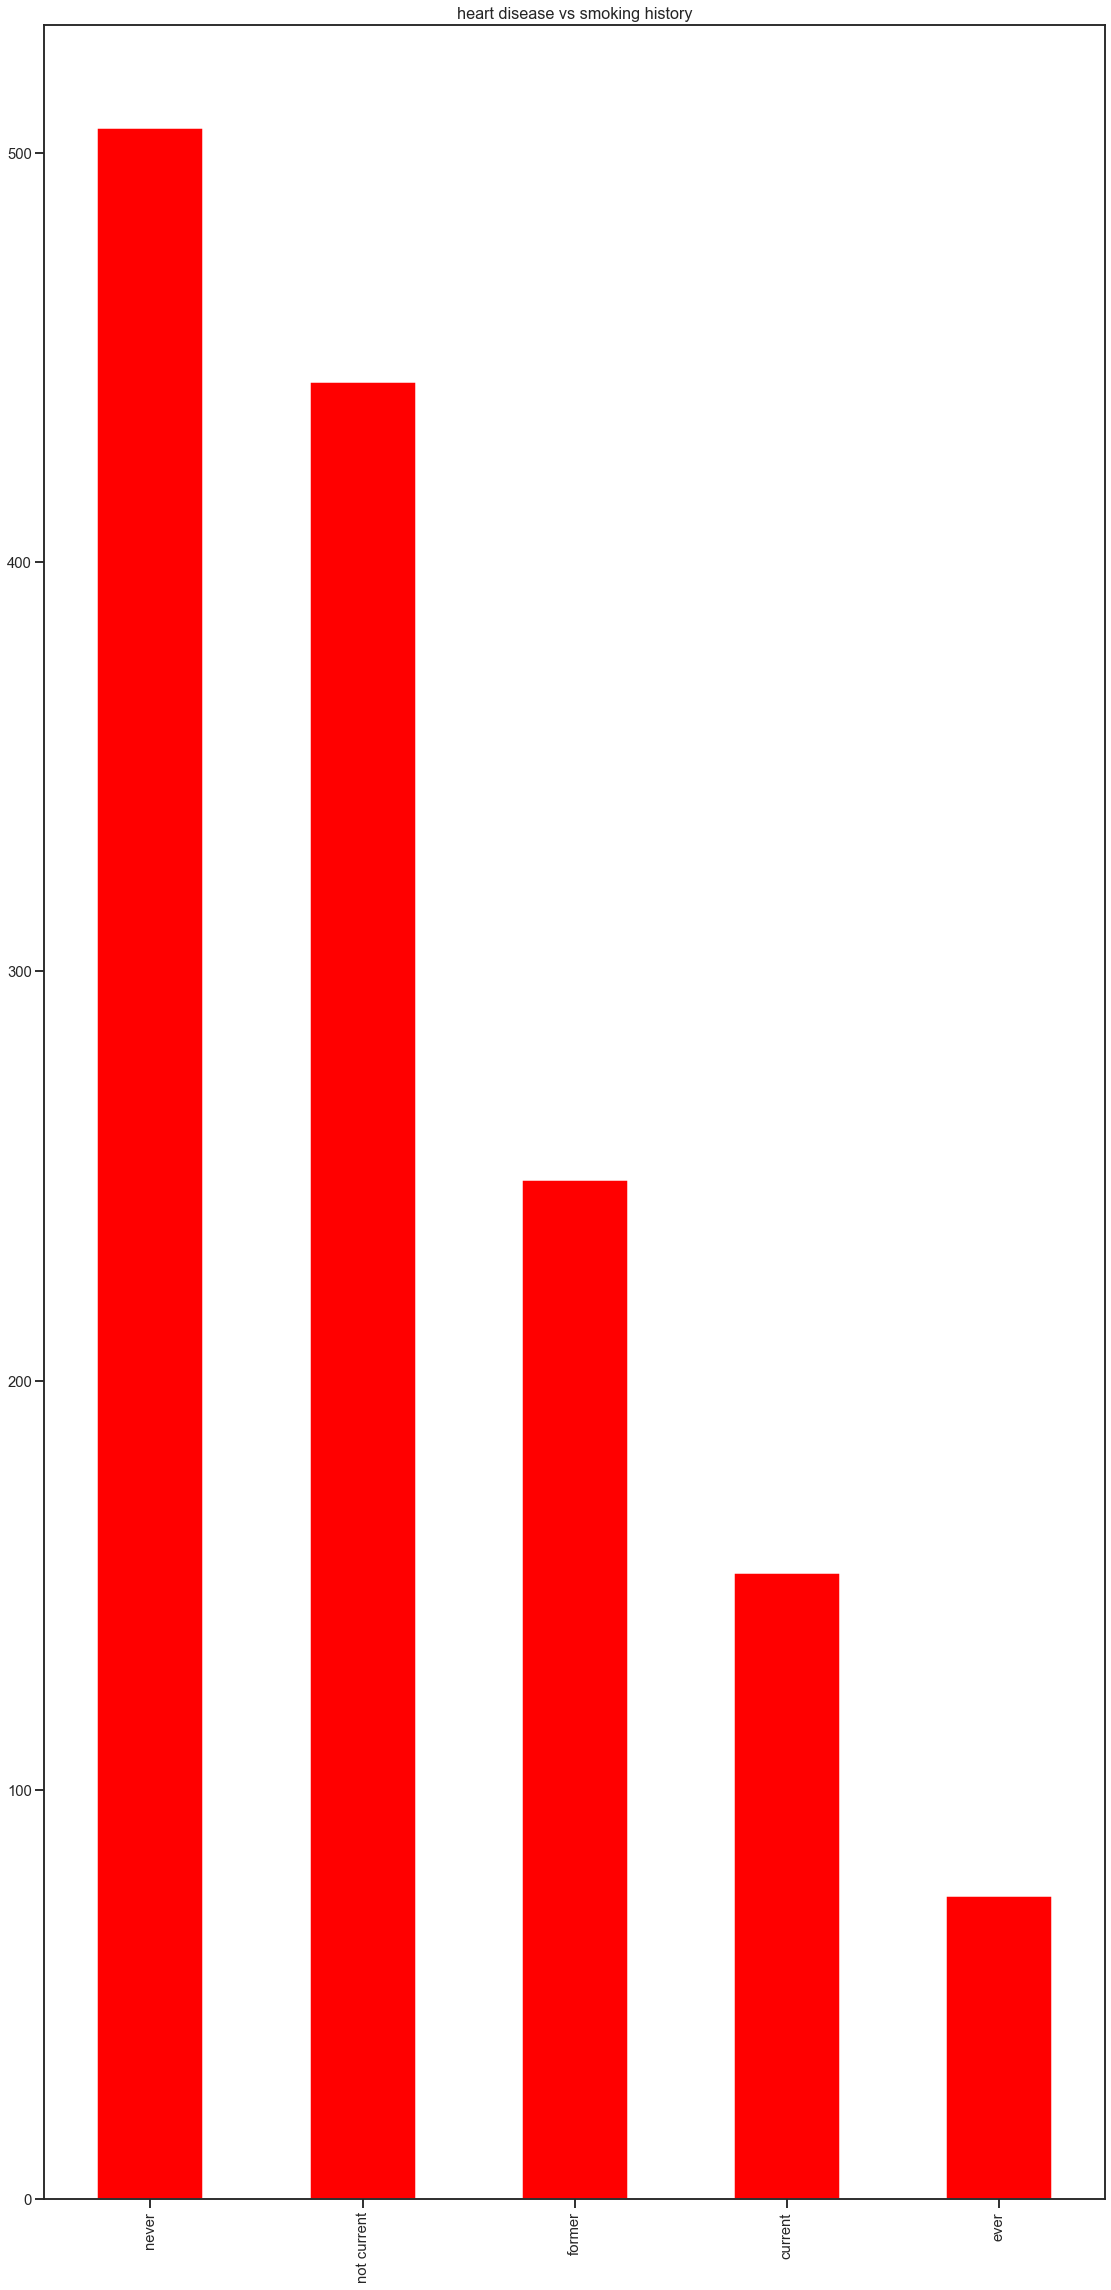

In [55]:
df[df['stroke']==1] ['smoking history'].value_counts().plot(kind='bar',color='red', title='heart disease vs smoking history')

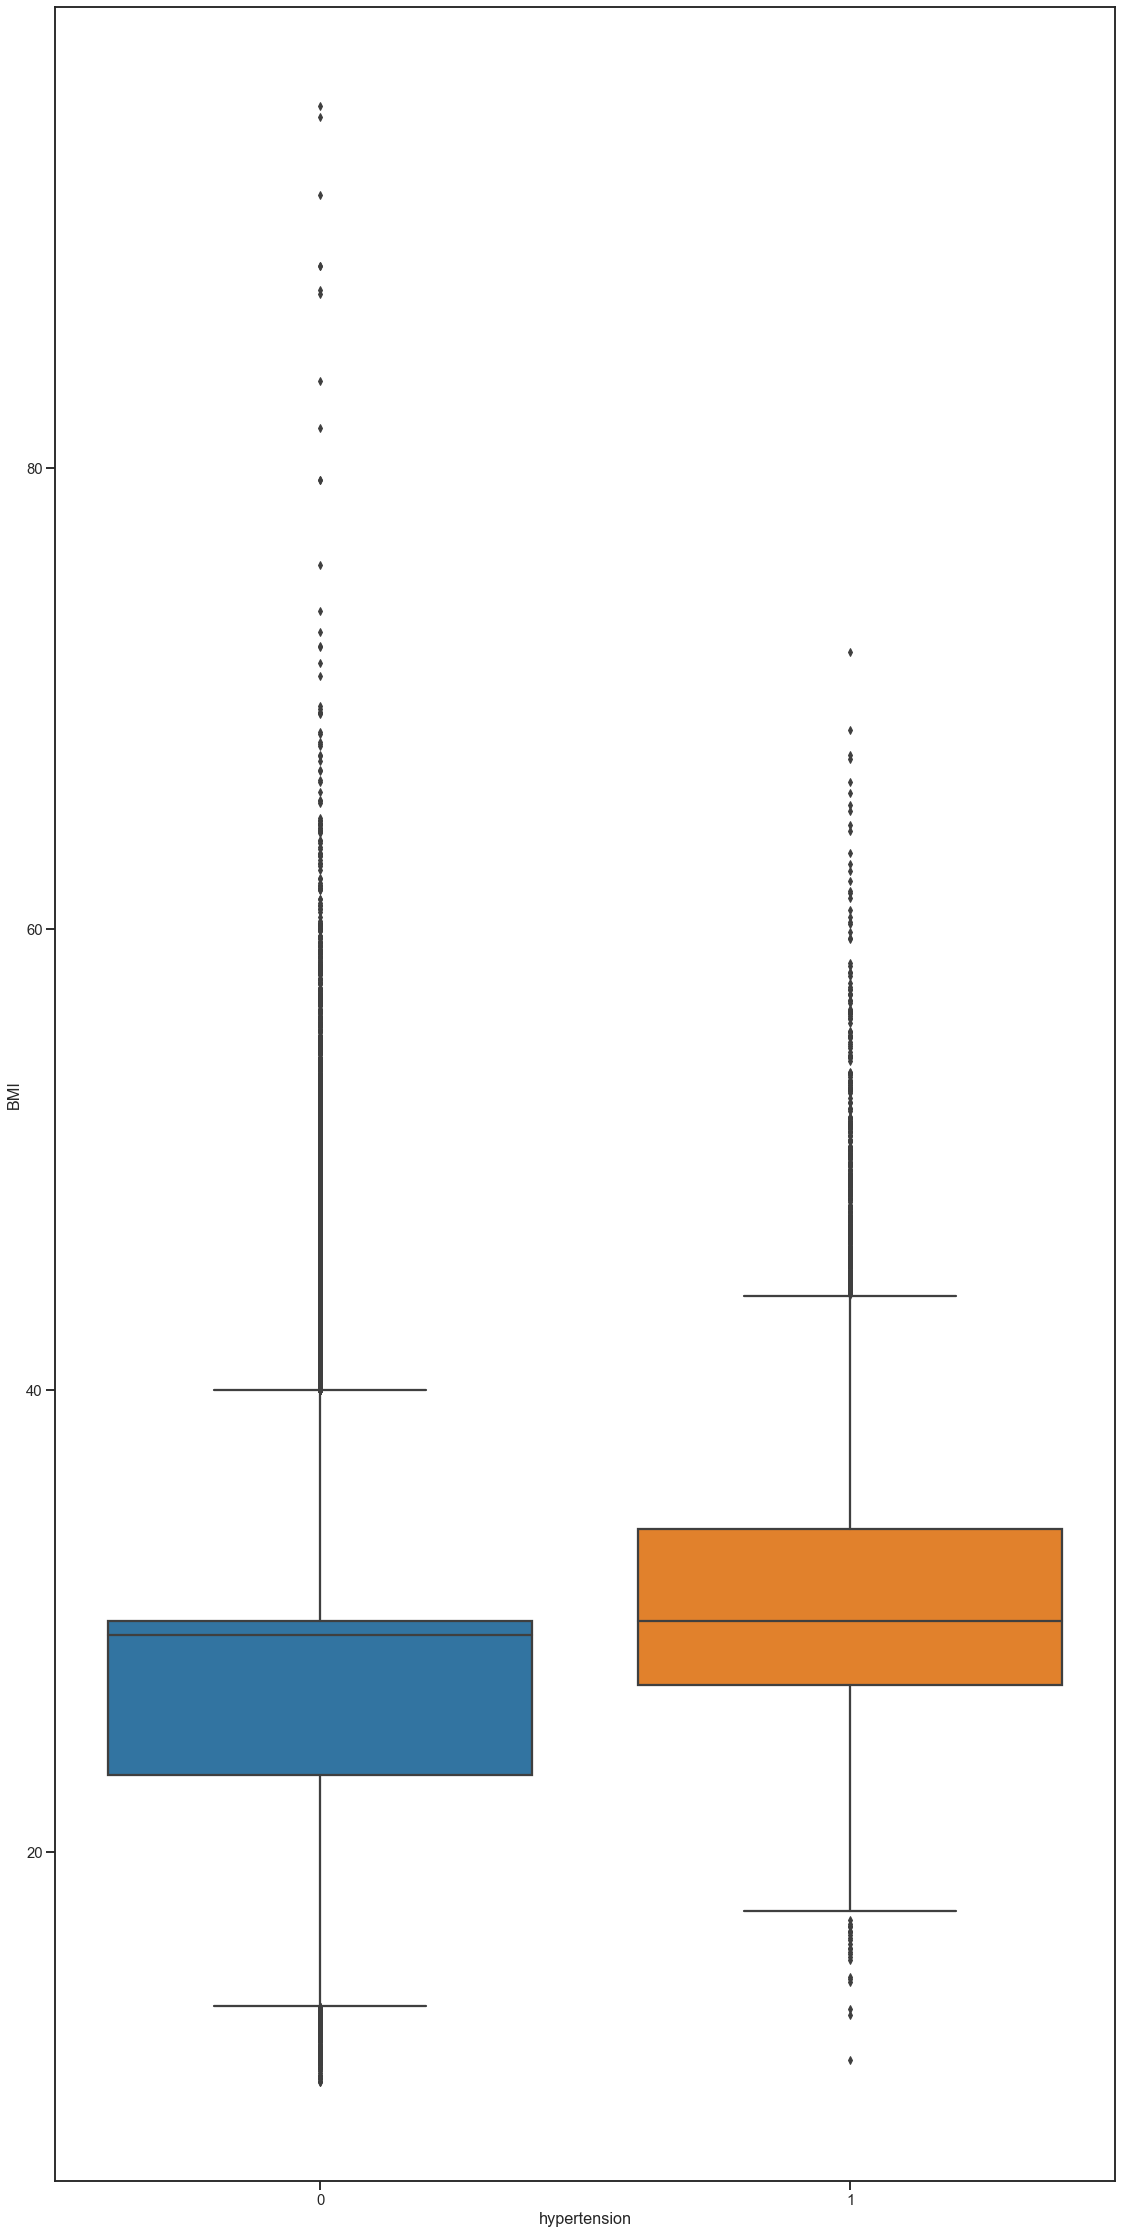

In [56]:
sns.boxplot(x='hypertension', y='BMI',data=df)
plt.savefig('j.png')

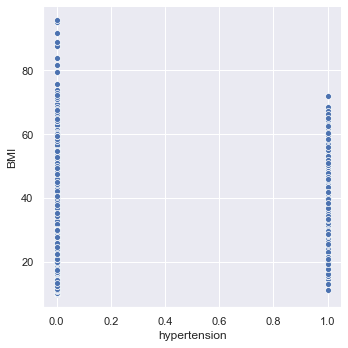

In [57]:
sns.set(style="darkgrid")
tips = sns.load_dataset("tips")              #tips is inbuild dataset in seaborn
sns.relplot(x="hypertension", y="BMI", data=df);
plt.savefig('k.png')

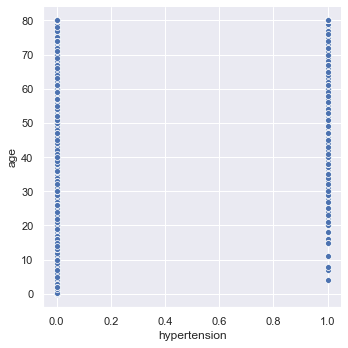

In [58]:
sns.set(style="darkgrid")
tips = sns.load_dataset("tips")              #tips is inbuild dataset in seaborn
sns.relplot(x="hypertension", y="age", data=df);

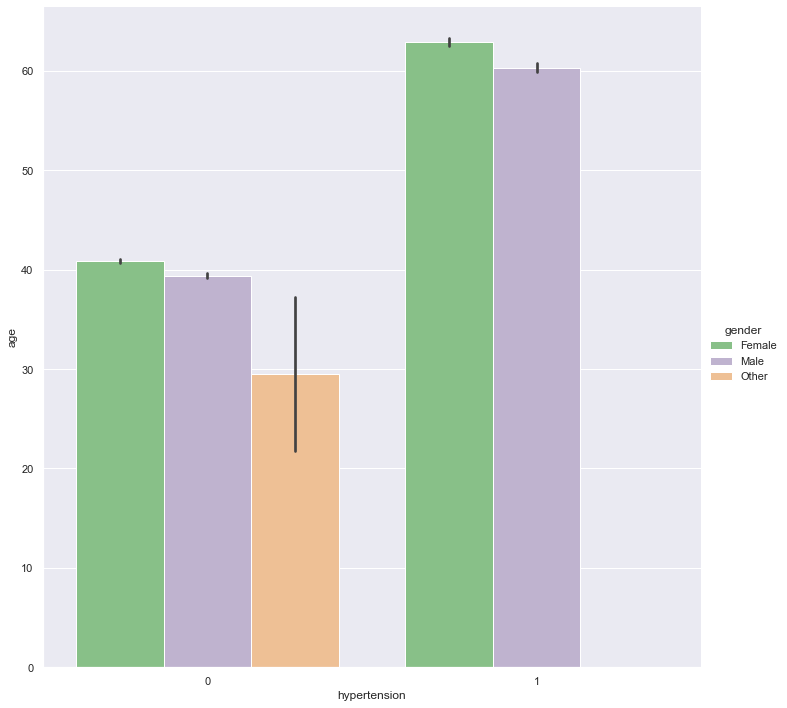

In [59]:
sns.catplot(x="hypertension",y="age",kind='bar',hue='gender',height=10,data=df,aspect=1,palette='Accent')
plt.savefig('k.png')

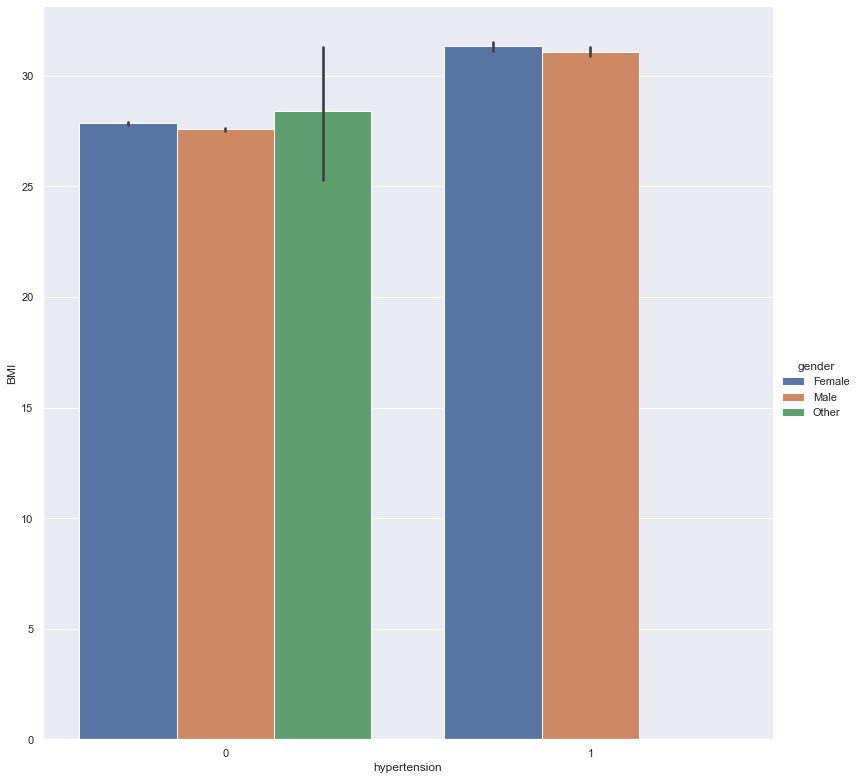

In [60]:
sns.catplot(x="hypertension",y="BMI",kind='bar',hue='gender',height=11,data=df)
plt.savefig('l.png')

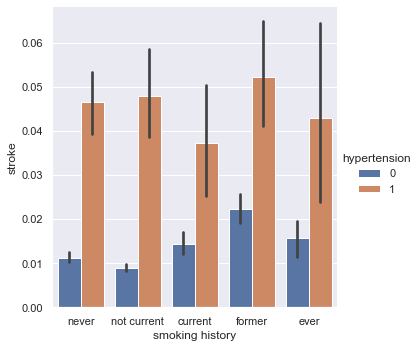

In [61]:
sns.catplot(x="smoking history",y="stroke",kind='bar',hue='hypertension',data=df)
plt.savefig('n.png')

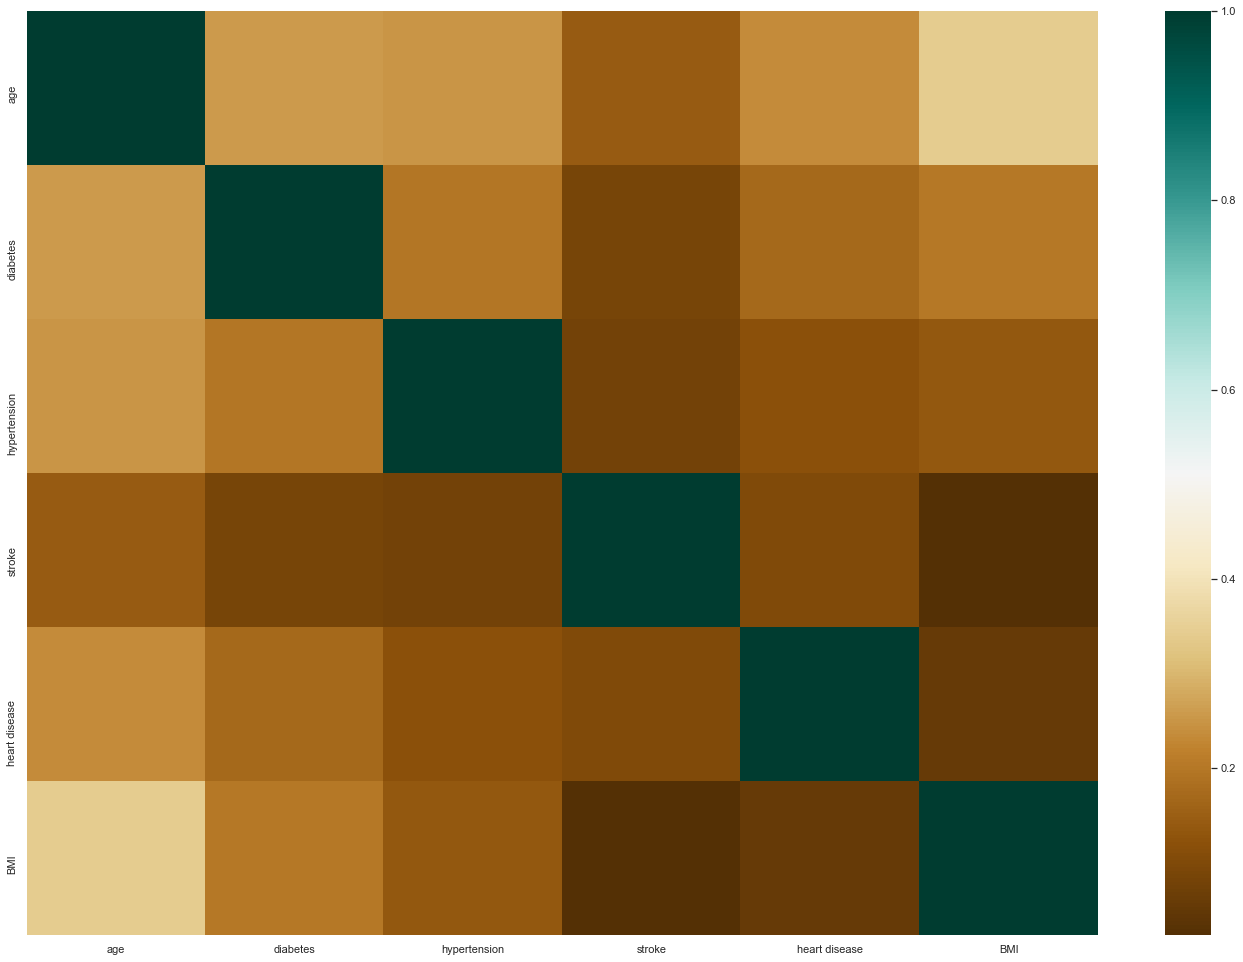

In [62]:
plt.subplots(figsize=(24,17))
sns.heatmap(df.corr(),cmap="BrBG",annot=False)
plt.savefig('m.png')

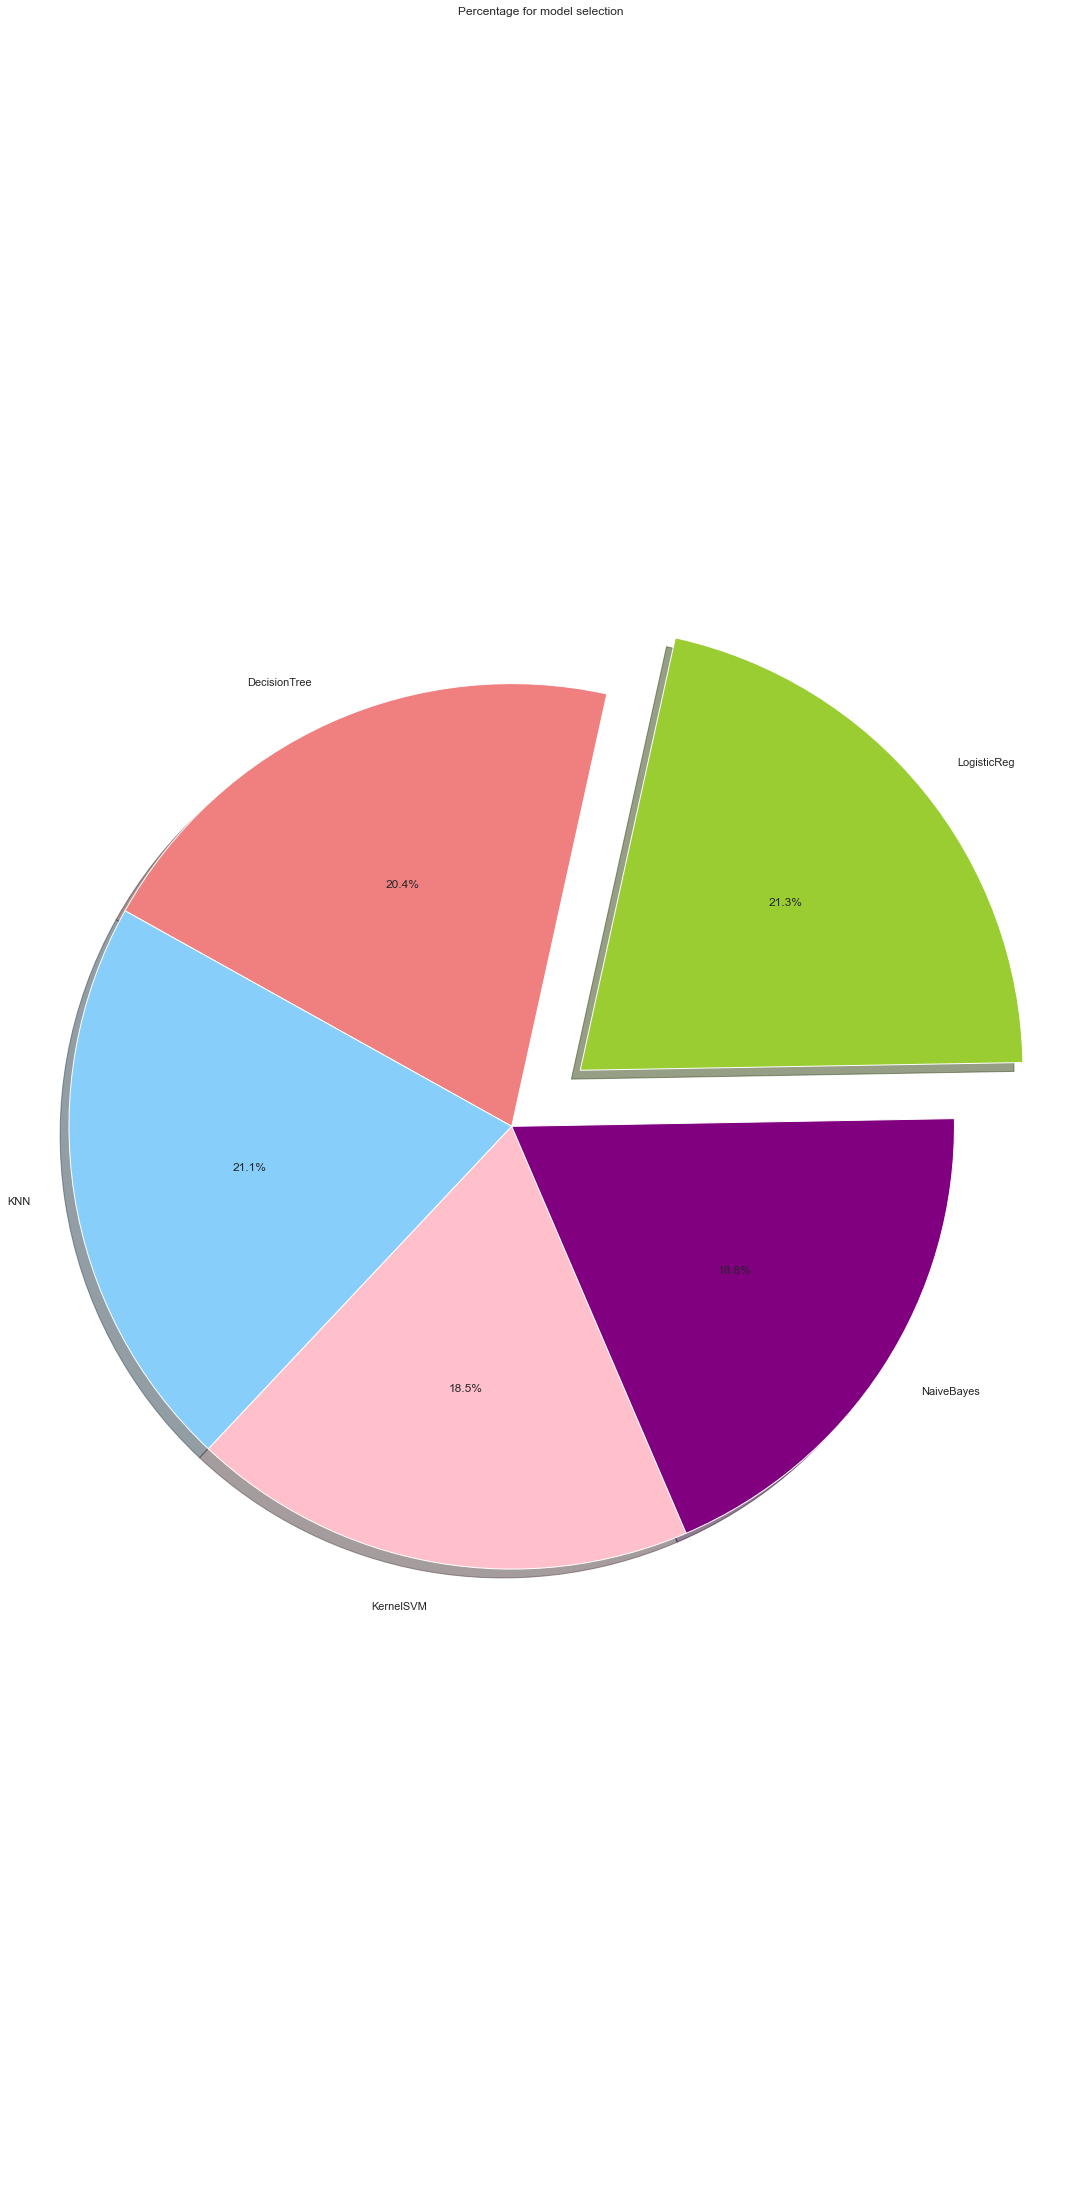

<Figure size 720x504 with 0 Axes>

In [63]:
labels = 'LogisticReg', 'DecisionTree', 'KNN','KernelSVM','NaiveBayes'
sizes = [0.924521 ,0.884463,0.916104, 0.802041 , 0.818367]
colors = ['yellowgreen', 'lightcoral', 'lightskyblue','pink','purple']
explode = (0.2,0, 0, 0,0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=1)
plt.rcParams['figure.figsize']=(10,7)
plt.axis('equal')
plt.title('Percentage for model selection')
plt.show()
plt.savefig('2.png')

In [64]:
df.head()

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI
0,Female,80.0,0,0,0,1,never,25.19
1,Female,54.0,0,0,0,0,not current,30.00
2,Male,28.0,0,0,0,0,never,30.00
3,Female,36.0,0,0,0,0,current,23.45
4,Male,76.0,0,1,0,1,current,20.14


In [65]:
smoked = pd.get_dummies(df['smoking history'],drop_first=True,prefix='smoked')

### smoked

In [67]:
df = pd.concat([df,smoked],axis=1)

In [68]:
df

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI,smoked_ever,smoked_former,smoked_never,smoked_not current
0,Female,80.0,0,0,0,1,never,25.19,0,0,1,0
1,Female,54.0,0,0,0,0,not current,30.00,0,0,0,1
2,Male,28.0,0,0,0,0,never,30.00,0,0,1,0
3,Female,36.0,0,0,0,0,current,23.45,0,0,0,0
4,Male,76.0,0,1,0,1,current,20.14,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,0,0,not current,30.00,0,0,0,1
99996,Female,2.0,0,0,0,0,not current,17.37,0,0,0,1
99997,Male,66.0,0,0,0,0,former,27.83,0,1,0,0
99998,Female,24.0,0,0,0,0,never,35.42,0,0,1,0


In [69]:
df.head()

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI,smoked_ever,smoked_former,smoked_never,smoked_not current
0,Female,80.0,0,0,0,1,never,25.19,0,0,1,0
1,Female,54.0,0,0,0,0,not current,30.00,0,0,0,1
2,Male,28.0,0,0,0,0,never,30.00,0,0,1,0
3,Female,36.0,0,0,0,0,current,23.45,0,0,0,0
4,Male,76.0,0,1,0,1,current,20.14,0,0,0,0


In [70]:
df.to_csv('healthdata.csv',index=False)

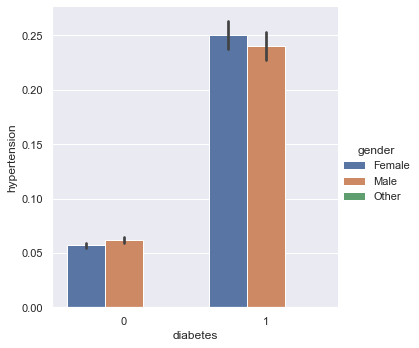

In [71]:
sns.catplot(x="diabetes",y="hypertension",kind='bar',hue='gender',data=df)

In [72]:
df['smoking history'].value_counts()

not current    42203
never          35112
former          9374
current         9307
ever            4004
Name: smoking history, dtype: int64

In [73]:
df.head()

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI,smoked_ever,smoked_former,smoked_never,smoked_not current
0,Female,80.0,0,0,0,1,never,25.19,0,0,1,0
1,Female,54.0,0,0,0,0,not current,30.00,0,0,0,1
2,Male,28.0,0,0,0,0,never,30.00,0,0,1,0
3,Female,36.0,0,0,0,0,current,23.45,0,0,0,0
4,Male,76.0,0,1,0,1,current,20.14,0,0,0,0


In [74]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [75]:
df['gender']=le.fit_transform(df['gender'])
df.head()

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI,smoked_ever,smoked_former,smoked_never,smoked_not current
0,0,80.0,0,0,0,1,never,25.19,0,0,1,0
1,0,54.0,0,0,0,0,not current,30.00,0,0,0,1
2,1,28.0,0,0,0,0,never,30.00,0,0,1,0
3,0,36.0,0,0,0,0,current,23.45,0,0,0,0
4,1,76.0,0,1,0,1,current,20.14,0,0,0,0


In [77]:
df['smoking history']=le.fit_transform(df['smoking history'])
df.head()

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI,smoked_ever,smoked_former,smoked_never,smoked_not current
0,0,80.0,0,0,0,1,3,25.19,0,0,1,0
1,0,54.0,0,0,0,0,4,30.00,0,0,0,1
2,1,28.0,0,0,0,0,3,30.00,0,0,1,0
3,0,36.0,0,0,0,0,0,23.45,0,0,0,0
4,1,76.0,0,1,0,1,0,20.14,0,0,0,0


In [78]:
df.keys()

Index(['gender', 'age', 'diabetes', 'hypertension', 'stroke', 'heart disease',
       'smoking history', 'BMI', 'smoked_ever', 'smoked_former',
       'smoked_never', 'smoked_not current'],
      dtype='object')

In [79]:
x=df[['gender', 'age', 'hypertension', 'stroke', 'heart disease', 'BMI','smoking history']]
y=df['diabetes']

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3, random_state=101)

In [81]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_train=mms.fit_transform(x_train)
x_test=mms.transform(x_test)

In [82]:
x_train

array([[0.        , 0.5995996 , 0.        , ..., 0.        , 0.20669935,
        0.75      ],
       [1.        , 0.12412412, 0.        , ..., 0.        , 0.1136788 ,
        1.        ],
       [0.        , 0.52452452, 0.        , ..., 0.        , 0.33111578,
        0.5       ],
       ...,
       [0.5       , 1.        , 1.        , ..., 0.        , 0.19537815,
        0.75      ],
       [0.5       , 0.64964965, 0.        , ..., 0.        , 0.24393091,
        0.75      ],
       [0.        , 0.61211211, 0.        , ..., 0.        , 0.14612512,
        1.        ]])

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [85]:
predictions = logmodel.predict(x_test)
pd.DataFrame(predictions).head(50)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [86]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [87]:
cm_log = confusion_matrix(y_test, predictions)
cm_log

array([[30367,   167],
       [ 2633,   167]], dtype=int64)

In [88]:
accuracy_score = accuracy_score(y_test, predictions)
print(accuracy_score*100)

91.60016799664007


In [89]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     30534
           1       0.50      0.06      0.11      2800

    accuracy                           0.92     33334
   macro avg       0.71      0.53      0.53     33334
weighted avg       0.88      0.92      0.88     33334

